## All Experiments

### Analysis of transferability per Depthwise Separable Convolutional block on MobileNet v1.

* __base B__ - MobileNet with 3 classes trained from scratch on self-driving data.
* __sellfer BnB__ - MobileNet with n blocks transferred and frozen from _base B_ network. All the remaining blocks are initialized randomly and trained for task B.
* __transfer AnB__ - MobileNet with n blocks transferred and frozen from a model trained on ImageNet (task A), all the remanining blocks are random initialized and trained for task B.
* __transfer AnB+__ - similar to _transfer AnB_, but the n transferred blocks are also trained for task B.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('all_experiments.csv')
data.head()

,network,block,test_accuracy
0,baseB,0,0.9089
1,baseB+,0,0.9212
2,BnB,1,0.9138
3,BnB,2,0.9231
4,BnB,3,0.9207


In [3]:
lst_models = list(data.network.unique())

In [4]:
xrange = np.arange(0, 14)

<Figure size 432x288 with 0 Axes>

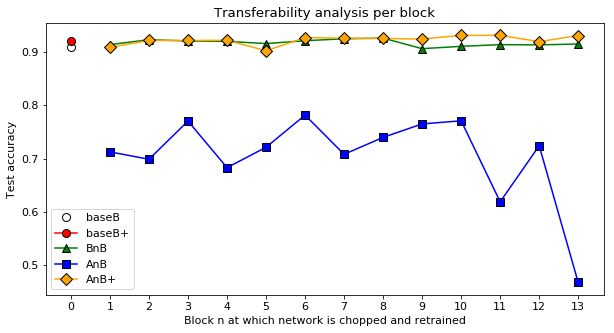

In [39]:
markersize = 8
linestyle = '-'
edge = 'black'
plt.clf()
plt.figure(figsize=(10,5))
plt.plot(data[data.network=='baseB']['block'], data[data.network=='baseB']['test_accuracy'], 
         marker='o', 
         color='white', 
         markeredgecolor=edge, 
         markersize=markersize, 
         linestyle=linestyle)
plt.plot(data[data.network=='baseB+']['block'], data[data.network=='baseB+']['test_accuracy'],
         marker='o', 
         color='red', 
         markeredgecolor=edge, 
         markersize=markersize, 
         linestyle=linestyle)
plt.plot(data[data.network=='BnB']['block'], data[data.network=='BnB']['test_accuracy'], 
         marker='^', 
         color='green', 
         markeredgecolor=edge, 
         markersize=markersize, 
         linestyle=linestyle)
plt.plot(data[data.network=='AnB']['block'], data[data.network=='AnB']['test_accuracy'], 
         marker='s', 
         color='blue', 
         markeredgecolor=edge, 
         markersize=markersize, 
         linestyle=linestyle)
plt.plot(data[data.network=='AnB+']['block'], data[data.network=='AnB+']['test_accuracy'], 
         marker='D', 
         color='orange', 
         markeredgecolor=edge, 
         markersize=markersize, 
         linestyle=linestyle)
plt.title('Transferability analysis per block') 
plt.xlabel('Block n at which network is chopped and retrained') 
plt.ylabel('Test accuracy') 
plt.xticks(xrange)
plt.legend(list(data.network.unique()), loc='best') 
plt.rcParams.update({'font.size': 11})
plt.show() 